In [18]:
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf   
import numpy as np

In [16]:
# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [19]:
def load_data():
 
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "C:/Users/AndriiHura/input/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [20]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [21]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 4028
Number of testing examples: 636
Each image is of size: (150, 150, 3)


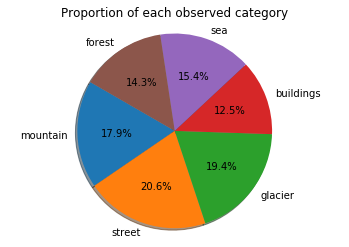

In [48]:
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()


In [24]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

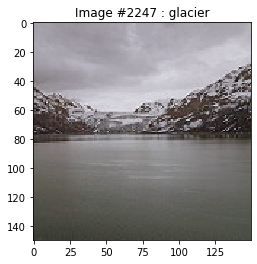

In [25]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

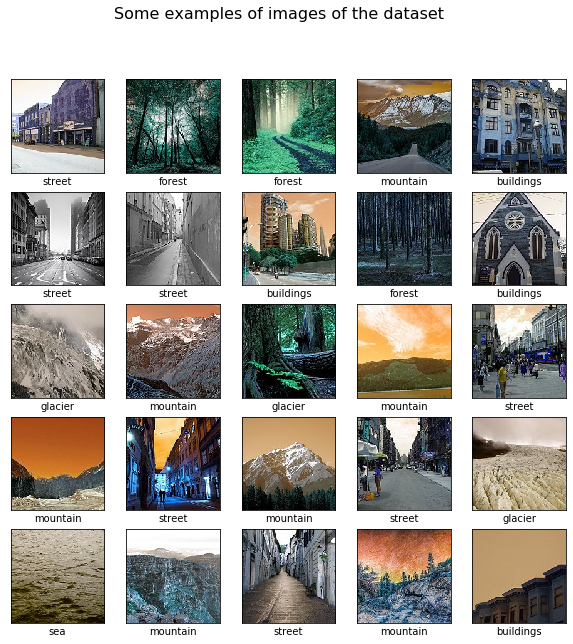

In [26]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                           input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels,
                    batch_size=128, epochs=5, validation_split = 0.2)

Train on 3222 samples, validate on 806 samples
Epoch 1/5
3222/3222 [==============================] - 79s 24ms/sample - loss: 1.9983 - accuracy: 0.3336 - val_loss: 1.2238 - val_accuracy: 0.5459
Epoch 2/5
3222/3222 [==============================] - 60s 19ms/sample - loss: 1.0659 - accuracy: 0.5953 - val_loss: 0.9924 - val_accuracy: 0.6216
Epoch 3/5
3222/3222 [==============================] - 56s 18ms/sample - loss: 0.8942 - accuracy: 0.6626 - val_loss: 0.9577 - val_accuracy: 0.6390
Epoch 4/5
3222/3222 [==============================] - 56s 18ms/sample - loss: 0.7495 - accuracy: 0.7393 - val_loss: 0.9556 - val_accuracy: 0.6501
Epoch 5/5
3222/3222 [==============================] - 62s 19ms/sample - loss: 0.6108 - accuracy: 0.7886 - val_loss: 0.8509 - val_accuracy: 0.6960


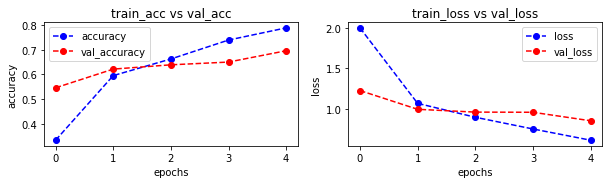

In [33]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [35]:
test_loss = model.evaluate(test_images, test_labels)

636/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

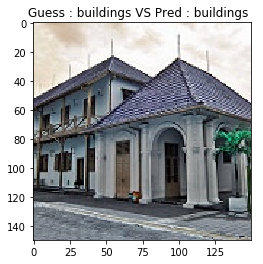

In [39]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

# Lets add some layers

In [40]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [41]:
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Let's also make twice more epochs

In [42]:
history_2 = model_2.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Train on 3222 samples, validate on 806 samples
Epoch 1/10
3222/3222 [==============================] - 59s 18ms/sample - loss: 2.3268 - accuracy: 0.3181 - val_loss: 1.2127 - val_accuracy: 0.5236
Epoch 2/10
3222/3222 [==============================] - 59s 18ms/sample - loss: 1.0785 - accuracy: 0.5881 - val_loss: 0.9669 - val_accuracy: 0.6266
Epoch 3/10
3222/3222 [==============================] - 57s 18ms/sample - loss: 0.8182 - accuracy: 0.7017 - val_loss: 0.9318 - val_accuracy: 0.6538
Epoch 4/10
3222/3222 [==============================] - 58s 18ms/sample - loss: 0.6993 - accuracy: 0.7452 - val_loss: 0.8888 - val_accuracy: 0.6935
Epoch 5/10
3222/3222 [==============================] - 58s 18ms/sample - loss: 0.5176 - accuracy: 0.8225 - val_loss: 0.8521 - val_accuracy: 0.6998
Epoch 6/10
3222/3222 [==============================] - 58s 18ms/sample - loss: 0.3991 - accuracy: 0.8734 - val_loss: 0.9047 - val_accuracy: 0.6638
Epoch 7/10
3222/3222 [==============================] - 61s 19ms/

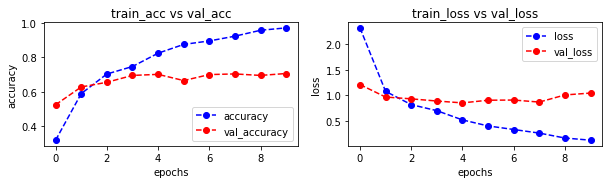

In [44]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history_2.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history_2.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history_2.history['loss'],'bo--', label = "loss")
plt.plot(history_2.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Let's take a look at some mispredicted instances

In [51]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    actual_labels = test_labels[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]]+"("+class_names[actual_labels[i]]+")")
    plt.show()

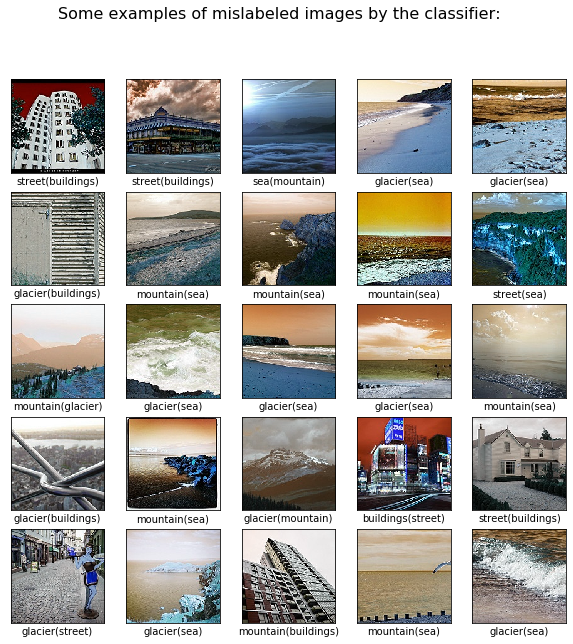

In [52]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)